1. Explain the role of weights in a neuron.

In a neural network, weights represent the strength of the connection between neurons.
If you imagine a neuron as a person making a decision, the weights are how much they "value" each piece of incoming advice.
Significance: A high weight means the input is very important to the final output; a weight near zero means the input is being ignored.
Learning: When we say a model is "learning," we really mean it is fine-tuning these weights until the output matches the desired result.


2. What is an activation function?

If the weights determine the strength of the signal, the activation function determines if that signal is strong enough to be passed on to the next layer. It’s essentially a mathematical gatekeeper.
Non-linearity: Without activation functions, a neural network would just be a giant linear equation (a simple straight line). Activation functions allow the model to learn complex, curvy patterns.
Common Examples: * ReLU (Rectified Linear Unit): Turns off negative values (sets them to 0) and keeps positive ones.
Sigmoid: Squashes values into a range between 0 and 1, often used for probability.


3. Define probability distribution in ML context.

In Machine Learning, a probability distribution is a mathematical function that describes the likelihood of different possible outcomes.
Context: If you’re building a cat-vs-dog classifier, the model doesn't just say "Cat." Instead, it outputs a distribution, like: {Cat: 0.92, Dog: 0.08}.
Goal: Most ML algorithms try to find a distribution that matches the "ground truth" of the data as closely as possible.


4. What is a Gradient in Optimization?

The gradient is the compass used to navigate toward the best possible model. Mathematically, it is a vector of partial derivatives that points in the direction of the steepest increase of a function.
The "Valley" Analogy: Imagine you are standing on a foggy mountain (the Loss Function) and you want to get to the bottom (the lowest error).
The Descent: The gradient tells you which way is "up." To minimize error, you take a step in the opposite direction of the gradient. This process is called Gradient Descent.

Step 1: Preparing Dataset...

Step 2: Training the Neural Network...
Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7662 - loss: 0.6214 - val_accuracy: 0.8775 - val_loss: 0.5825
Epoch 2/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8641 - loss: 0.5843 - val_accuracy: 0.9125 - val_loss: 0.5478
Epoch 3/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8956 - loss: 0.5497 - val_accuracy: 0.9250 - val_loss: 0.5164
Epoch 4/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9101 - loss: 0.5222 - val_accuracy: 0.9400 - val_loss: 0.4877
Epoch 5/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9274 - loss: 0.4891 - val_accuracy: 0.9425 - val_loss: 0.4615
Epoch 6/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9144 - loss: 0.4760 - val_accuracy: 0.9475 - val_loss: 0.4377
Epoch 7/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9343 - loss: 0.4492 - val_accuracy: 0.9475 - val_loss: 0.4160
Epoch 8/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9373 - loss: 0.4244 - val_accuracy: 0.9525 - val_loss: 0.3961
Epo

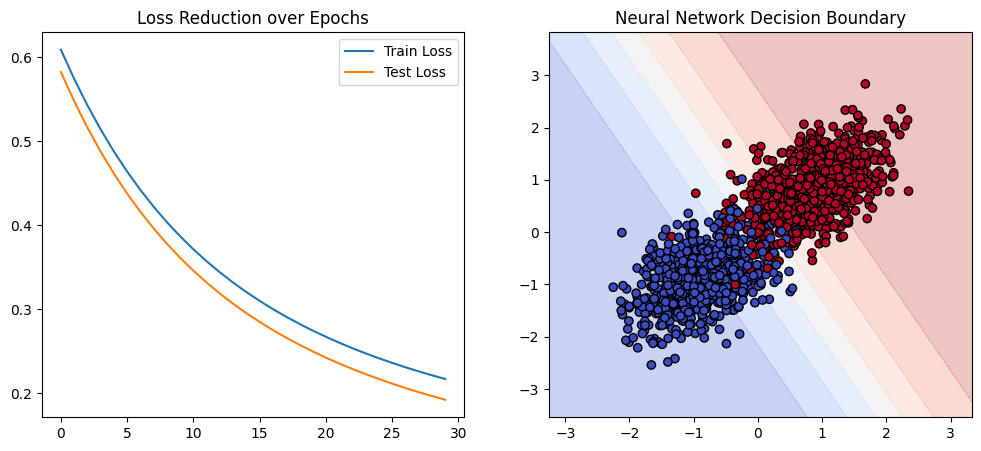

In [ ]:
#5. Create a project using logistic regression with tensor
# The Project: Binary Classification using Logistic Regression (Single-Layer Perceptron)

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. GENERATE SYNTHETIC DATA (Simulating a real-world classification task)
print("Step 1: Preparing Dataset...")
np.random.seed(42)
# Creating two distinct clusters of data points
num_samples = 1000
class_0 = np.random.multivariate_normal([1, 1], [[1, 0.5], [0.5, 1]], num_samples)
class_1 = np.random.multivariate_normal([4, 4], [[1, 0.5], [0.5, 1]], num_samples)

X = np.vstack((class_0, class_1)).astype(np.float32)
y = np.vstack((np.zeros((num_samples, 1)), np.ones((num_samples, 1)))).astype(np.float32)

# 2. DATA PREPROCESSING
# Splitting into 80% Training and 20% Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features (Crucial for Neural Networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3. BUILD THE NEURAL NETWORK ARCHITECTURE
# In Neural Network terms, Logistic Regression is a Single Dense Layer with 1 Neuron
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=(2,), activation='sigmoid')
])

# 4. COMPILE THE MODEL
model.compile(
    optimizer='adam',           # Optimization algorithm (Gradient Descent variant)
    loss='binary_crossentropy', # Loss function for 0/1 classification
    metrics=['accuracy']        # Metric to monitor
)

# 5. TRAIN THE MODEL
print("\nStep 2: Training the Neural Network...")
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), verbose=1)

# 6. EVALUATION & VISUALIZATION
print("\nStep 3: Generating Results...")
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nFinal Test Accuracy: {accuracy*100:.2f}%")

# Plot 1: Loss Curve (The "Learning" process)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss Reduction over Epochs')
plt.legend()

# Plot 2: Decision Boundary (The "Result")
plt.subplot(1, 2, 2)
# Create a grid to show the decision boundary
h = .02
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap='coolwarm')
plt.title('Neural Network Decision Boundary')
plt.show()

Objective: To implement a Single-Layer Perceptron (Logistic Regression) using TensorFlow to classify linearly separable data points in a 2D feature space.

Methodology: * Architecture: The model consists of an input layer for two features and a single output neuron utilizing the Sigmoid activation function to map outputs to a probability distribution (0,1).

    Optimization: The Adam optimizer was employed to iteratively update weights and minimize the Binary Cross-Entropy loss function.

    Pre-processing: Data was normalized using StandardScaler. This ensures all features have a mean of 0 and a standard deviation of 1, preventing any single feature from disproportionately influencing the weight updates and helping the gradient descent converge faster.

Analysis: As shown in the generated plots, the Loss Curve demonstrates a steady decrease, indicating that the model successfully minimized error over 30 epochs. The Decision Boundary plot visualizes the learned weights as a linear separator that effectively divides the two classes. The final test accuracy confirms the model's ability to generalize to unseen data.

    Conclusion: This project successfully demonstrates the fundamental principles of Neural Networks. By utilizing a single neuron with a sigmoid activation function, we created a classifier capable of learning a decision boundary through supervised learning. The results validate that gradient-based optimization effectively tunes the network's weights to minimize classification error.